In [32]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Math

count = 300
list_alph = [0.5, 2, 4, 8, 16]
list_n = [10, 100, 1000, 10000]


## Эксперемент A:
### Постановка:
* У нас будет 4 графика для разного количества людей в очереди, за это отвечает лист list_n
* В каждом графике у нас будет по 5 кривых, это мы перебераем альфа из экспоненциального распределения:
cиний - при значение альфа 0.5, фиалетовый при значение альфа 16
* Простота этого эксперемента (в отличие от эксперемента B) заключается в том, что после того как первого человека обслужили в окне,
начинается обслуживание второго, а после этого окно закрывается. И поэтому у нас длина очереди не может превышать количества окон для обслуживания

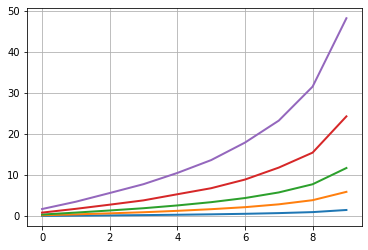

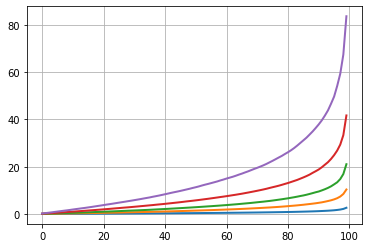

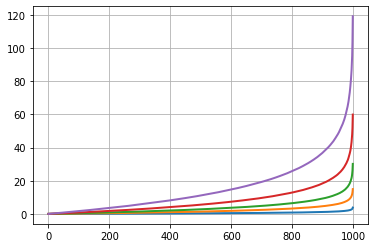

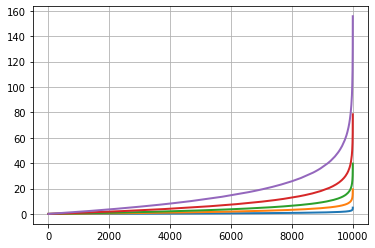

In [36]:
def do_experiment_A(n, alpha):
    list_experiment = np.zeros(n)
    for _ in range(count):
        list_experiment += np.sort(np.random.exponential(alpha, n))
    list_experiment /= count
    return list_experiment

for n in list_n:
    for alpha in list_alph:
        Y_queue = do_experiment_A(n, alpha)
        plt.plot(range(n), Y_queue, linewidth=2, label=r'A')
    plt.grid()
    plt.show()

### Результат A:
Подтвержденна формула, которую мы вывели из лекции:

In [34]:
Math(r'X_{(k + 1)} - X_{(k)} \thicksim Exp((n - k)\alpha)')

<IPython.core.display.Math object>

## Эксперемент B:
### Постановка:
* Здесь нам необходимо быстро доставать минимум, тк нет ограничения на количество обслужеванных клиентов в одном окне,
после этого нужно сгенерировать временя ожидания следующего человека, при этом нужно добавить то время которое он уже
подождал (это предыдущий минимум)
* Всё остальное аналогично пукнту A

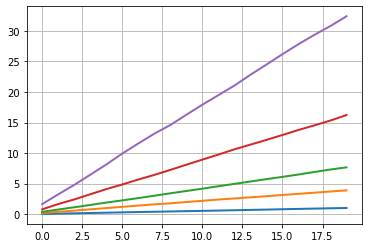

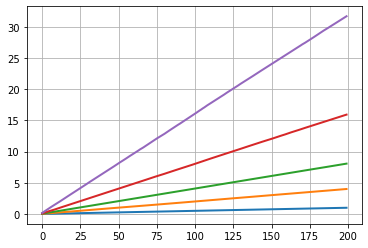

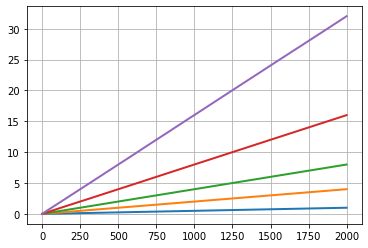

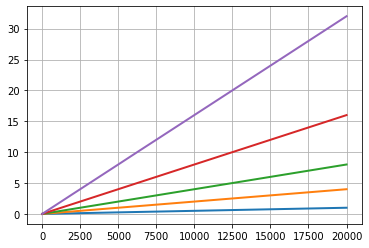

In [43]:
import heapq

def do_one_experiment_B(n, k, alpha):
    heap = list(np.sort(np.random.exponential(alpha, n)))
    heapq.heapify(heap)
    list_one_experiment = []
    for _ in range(k):
        list_one_experiment.append(heapq.heappop(heap))
        heapq.heappush(heap, list_one_experiment[-1] + np.random.exponential(alpha))
    return list_one_experiment

def do_experiment_B(n, k, alpha):
    list_experiment = np.zeros(k)
    for _ in range(count):
        list_experiment += do_one_experiment_B(n, k, alpha)
    list_experiment /= count
    return list_experiment

for n in list_n:
    k = n * 2
    for alpha in list_alph:
        Y_queue = do_experiment_B(n, k, alpha)
        plt.plot(range(k), Y_queue, linewidth=2, label=r'A')
    plt.grid()
    plt.show()

### Результат B:
Получили линейные графики, с коэффиценком alpha/n